# UAS

# 200411100171

## Persiapan Dataset

### Library

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

### Fungsi timestamp

In [ ]:
def df_to_X_y(df, window_size=2):
  X, y = [], []
#   df_np = df.to_numpy()
  for i in range(len(df) - window_size):
    seq_x, seq_y = df[i:i+window_size], df[i+window_size]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# def show_result_model(df_actual, y_forecast, model_name):
#     future_forecast = pd.DataFrame(y_forecast, index=df_test.index, columns=['prediksi'])
#     #mape = mean_absolute_percentage_error(df_test, y_forecast)
#     mape = mean_absolute_percentage_error(df_test, y_forecast)*100

#     mse = mean_squared_error(df_test, y_forecast, squared=True)
#     # dict_results[model_name] = [mape, mse]

#     pd.concat([df_test, future_forecast], axis=1).plot()

#     plt.legend()
#     plt.grid(True)
#     plt.xlabel("Tempo (dias)", fontsize=20)
#     plt.ylabel("Preço (R$)", fontsize=20)
#     plt.title(f'MAPE = {mape:.2f} % | MSE = {mse:.2f}', fontsize=25)

### Read data

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/farisulhaq/dataset/main/isat-jk.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,6/15/2020,2280,2450,2250,2250,1887.442749,46949400
1,6/16/2020,2350,2390,2300,2380,1996.494995,23314400
2,6/17/2020,2390,2420,2330,2350,1971.328979,12781300
3,6/18/2020,2300,2530,2290,2500,2097.158691,23787500
4,6/19/2020,2500,2550,2470,2530,2122.324463,10242400
...,...,...,...,...,...,...,...
725,6/7/2023,8475,8775,8250,8775,8775.000000,16717400
726,6/8/2023,8775,8850,8650,8700,8700.000000,9898700
727,6/9/2023,8700,8800,8575,8700,8700.000000,7169900
728,6/12/2023,8700,8950,8600,8650,8650.000000,6603600


### Jumlah data

In [ ]:
data.count()

Date         730
Open         730
High         730
Low          730
Close        730
Adj Close    730
Volume       730
dtype: int64

### Set index dates to data

In [ ]:
# data["Month"] = pd.to_datetime(data.Date, dayfirst=True)
data.set_index("Date", inplace=True)
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
6/15/2020,2280,2450,2250,2250,1887.442749,46949400
6/16/2020,2350,2390,2300,2380,1996.494995,23314400
6/17/2020,2390,2420,2330,2350,1971.328979,12781300
6/18/2020,2300,2530,2290,2500,2097.158691,23787500
6/19/2020,2500,2550,2470,2530,2122.324463,10242400
...,...,...,...,...,...,...
6/7/2023,8475,8775,8250,8775,8775.000000,16717400
6/8/2023,8775,8850,8650,8700,8700.000000,9898700
6/9/2023,8700,8800,8575,8700,8700.000000,7169900


### Plot data

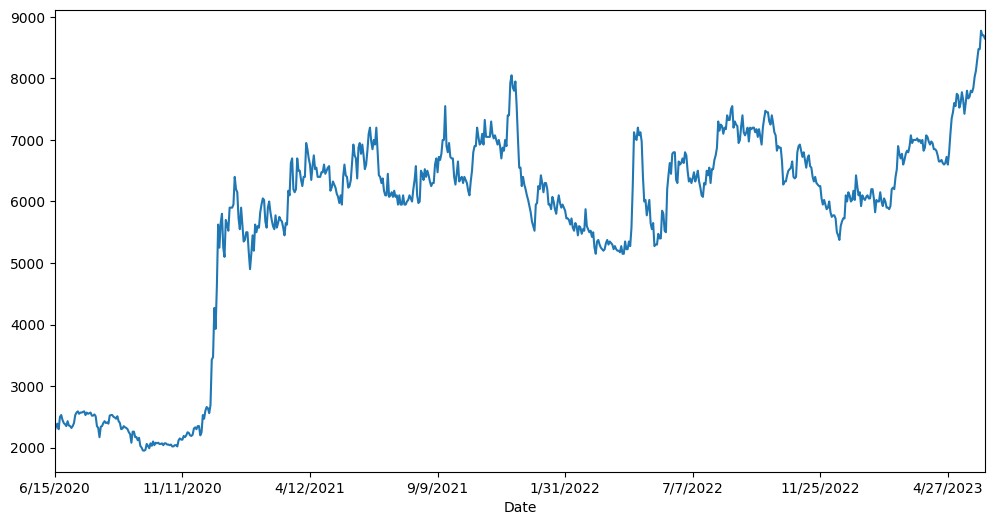

In [ ]:
data['Open'].plot(figsize=(12,6)).autoscale(axis='x',tight=True)

## Prepocessing data

### Timestamp

In [ ]:
window_size = 5
X, y = df_to_X_y(data['Open'], window_size)

### Cek ukuran data dan target

In [ ]:
X.shape, y.shape

((725, 5), (725,))

### Normalisasi

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(X)
scaled

array([[0.05409836, 0.06557377, 0.07213115, ..., 0.06007326, 0.05860806,
        0.05421245],
       [0.06557377, 0.07213115, 0.05737705, ..., 0.05860806, 0.05421245,
        0.05860806],
       [0.07213115, 0.05737705, 0.09016393, ..., 0.05421245, 0.05860806,
        0.06593407],
       ...,
       [0.89754098, 0.92622951, 0.95901639, ..., 0.95604396, 0.95604396,
        1.        ],
       [0.92622951, 0.95901639, 0.93852459, ..., 0.95604396, 1.        ,
        0.98901099],
       [0.95901639, 0.93852459, 0.94262295, ..., 1.        , 0.98901099,
        0.98901099]])

### Split data training dan test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled, y, test_size=0.2, random_state=0, shuffle=False)

## Modelling

### Training

In [ ]:
gNB = GaussianNB()
gNB.fit(X_train, y_train)

GaussianNB()

### Test

In [ ]:
y_pred=gNB.predict(X_train)

### Plot hasil prediksi dan data actual

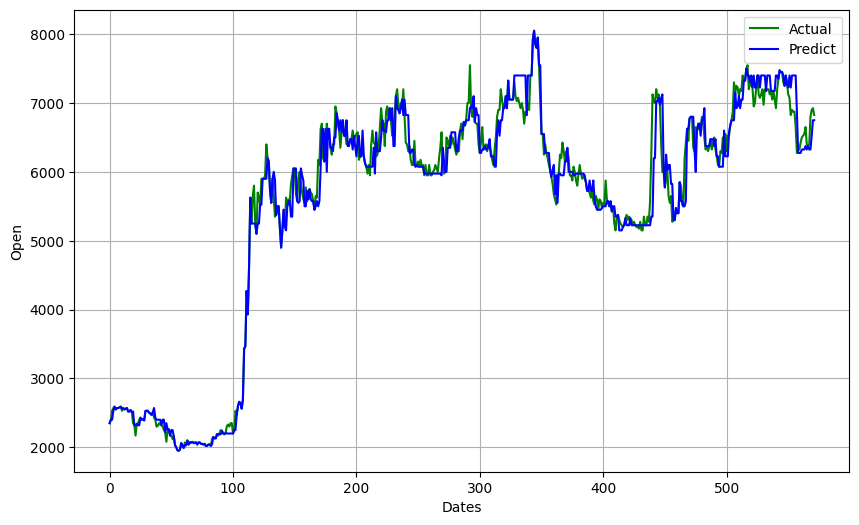

In [ ]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open')
plt.plot(y_train, 'green', label='Actual')
plt.plot(y_pred, 'blue', label='Predict')
plt.legend()

## Evalusi

### MAPE

In [ ]:
print(f'mape = {mean_absolute_percentage_error(y_train, y_pred)}')

mape = 0.02276163964647981


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
pipeline = Pipeline([
    ('pca', PCA(n_components=4)),
    ('algo', GaussianNB())
])

model_naive_3 = RandomizedSearchCV(pipeline, {}, cv=4, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model_naive_3.fit(X_train, y_train)

print(f'best_parameter: {model_naive_3.best_params_}')
print(model_naive_3.score(X_train, y_train), model_naive_3.best_score_, model_naive_3.score(X_test, y_test))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
best_parameter: {}
0.3356643356643357 0.04370629370629371 0.020833333333333332


## 200411100201

## Persiapan Dataset

### Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

### Fungsi timestamp

In [ ]:
def df_to_X_y(df, window_size=2):
  X, y = [], []
  # df = df.to_numpy()
  for i in range(len(df) - window_size):
    seq_x, seq_y = df[i:i+window_size], df[i+window_size]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)

### Read data

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/farisulhaq/dataset/main/isat-jk.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,6/15/2020,2280,2450,2250,2250,1887.442749,46949400
1,6/16/2020,2350,2390,2300,2380,1996.494995,23314400
2,6/17/2020,2390,2420,2330,2350,1971.328979,12781300
3,6/18/2020,2300,2530,2290,2500,2097.158691,23787500
4,6/19/2020,2500,2550,2470,2530,2122.324463,10242400
...,...,...,...,...,...,...,...
725,6/7/2023,8475,8775,8250,8775,8775.000000,16717400
726,6/8/2023,8775,8850,8650,8700,8700.000000,9898700
727,6/9/2023,8700,8800,8575,8700,8700.000000,7169900
728,6/12/2023,8700,8950,8600,8650,8650.000000,6603600


### Jumlah data

In [ ]:
data.count()

Date         730
Open         730
High         730
Low          730
Close        730
Adj Close    730
Volume       730
dtype: int64

### Set index dates to data

In [ ]:
# data["Month"] = pd.to_datetime(data.Date, dayfirst=True)
data.set_index("Date", inplace=True)
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
6/15/2020,2280,2450,2250,2250,1887.442749,46949400
6/16/2020,2350,2390,2300,2380,1996.494995,23314400
6/17/2020,2390,2420,2330,2350,1971.328979,12781300
6/18/2020,2300,2530,2290,2500,2097.158691,23787500
6/19/2020,2500,2550,2470,2530,2122.324463,10242400
...,...,...,...,...,...,...
6/7/2023,8475,8775,8250,8775,8775.000000,16717400
6/8/2023,8775,8850,8650,8700,8700.000000,9898700
6/9/2023,8700,8800,8575,8700,8700.000000,7169900


### Plot data

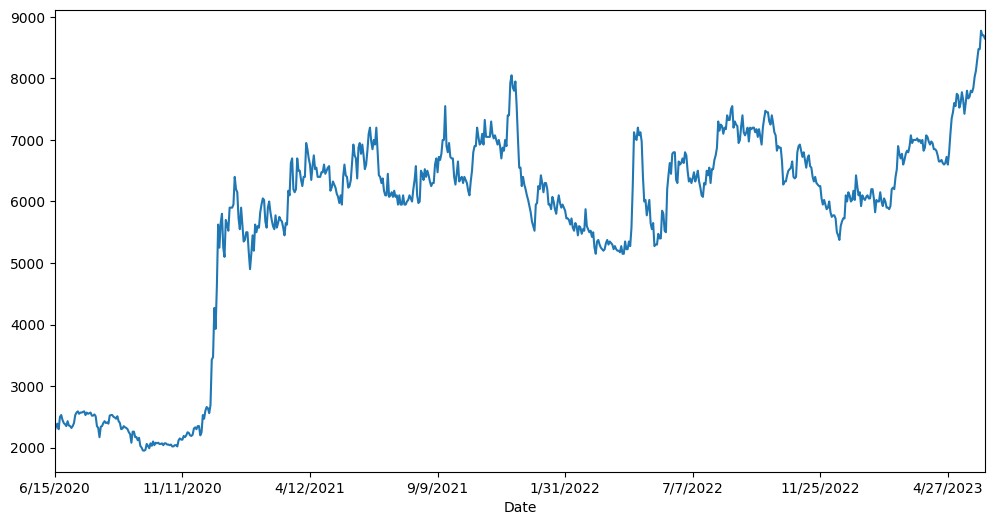

In [ ]:
data['Open'].plot(figsize=(12,6)).autoscale(axis='x',tight=True)

## Prepocessing data

### Timestamp

In [ ]:
window_size = 14
X, y = df_to_X_y(data['Open'], window_size)

### Cek ukuran data dan target

In [ ]:
X.shape, y.shape

((716, 14), (716,))

### Normalisasi

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(X)
scaled

array([[0.05409836, 0.06557377, 0.07213115, ..., 0.06007326, 0.05860806,
        0.05421245],
       [0.06557377, 0.07213115, 0.05737705, ..., 0.05860806, 0.05421245,
        0.05860806],
       [0.07213115, 0.05737705, 0.09016393, ..., 0.05421245, 0.05860806,
        0.06593407],
       ...,
       [0.89754098, 0.92622951, 0.95901639, ..., 0.95604396, 0.95604396,
        1.        ],
       [0.92622951, 0.95901639, 0.93852459, ..., 0.95604396, 1.        ,
        0.98901099],
       [0.95901639, 0.93852459, 0.94262295, ..., 1.        , 0.98901099,
        0.98901099]])

### Split data training dan test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled, y, test_size=0.2, random_state=0, shuffle=False)

## Modelling

### Training

In [ ]:
model = KNeighborsRegressor()

parameters = {
    'n_neighbors': list(range(3,50,2))
}

search = GridSearchCV(model, parameters)
search.fit(X, y)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27, 29, 31, 33, 35, 37, 39, 41, 43,
                                         45, 47, 49]})

In [ ]:
model_knn = KNeighborsRegressor(n_neighbors=9)
model_knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=9)

### Test

In [ ]:
y_pred=model_knn.predict(X_train)

### Plot hasil prediksi dan data actual

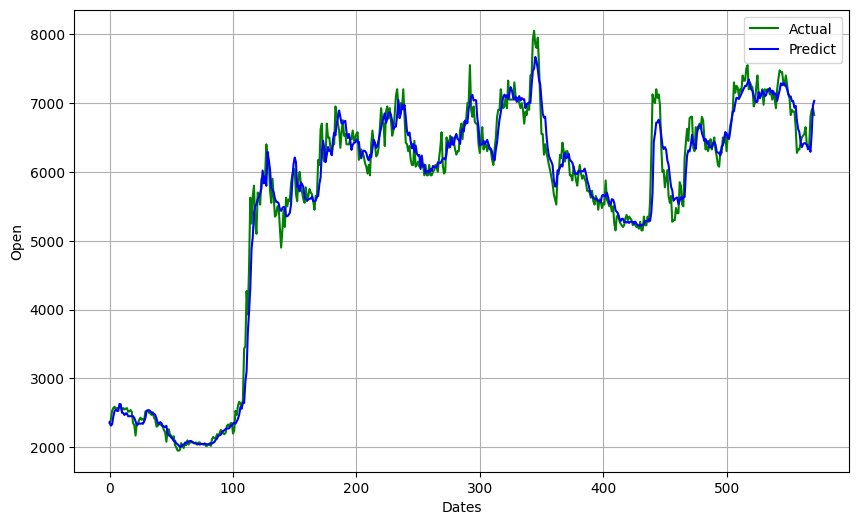

In [ ]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open')
plt.plot(y_train, 'green', label='Actual')
plt.plot(y_pred, 'blue', label='Predict')
plt.legend()

## Evalusi

### MAPE

In [ ]:
print(f'mape = {mean_absolute_percentage_error(y_train, y_pred)}')

mape = 0.027219643656305147
